In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('CO2 Emission.csv')

In [4]:
data.head()

,country,date,sector,value,timestamp
0,Brazil,01-01-2019,Power,0.096799,1546300800
1,China,01-01-2019,Power,14.816100,1546300800
2,EU27 & UK,01-01-2019,Power,1.886490,1546300800
3,France,01-01-2019,Power,0.051217,1546300800
4,Germany,01-01-2019,Power,0.315002,1546300800


In [5]:
data.tail()

,country,date,sector,value,timestamp
135403,Russia,31-05-2023,International Aviation,0.016524,1685491200
135404,Spain,31-05-2023,International Aviation,0.068408,1685491200
135405,UK,31-05-2023,International Aviation,0.103774,1685491200
135406,US,31-05-2023,International Aviation,0.200409,1685491200
135407,WORLD,31-05-2023,International Aviation,1.558450,1685491200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


In [7]:
data.isnull().sum()

country      0
date         0
sector       0
value        0
timestamp    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [16]:
# sum of emissions by sector
sector_emissions = data.groupby('sector')['value'].sum().sort_values(ascending=False)
print(sector_emissions)

sector
Power                     123306.678317
Industry                   97324.986200
Ground Transport           58090.650904
Residential                33700.627980
International Aviation      4241.328900
Domestic Aviation           2822.618346
Name: value, dtype: float64


In [17]:
# sum of emissions by country
country_emissions = data.groupby('country')['value'].sum().sort_values(ascending=False)
print(country_emissions)

country
WORLD        155539.622124
China         48003.071381
ROW           46392.618476
US            21631.820344
EU27 & UK     14004.102835
India         11107.959325
Russia         7841.046903
Japan          4722.530409
Germany        2951.018676
Brazil         1836.474832
UK             1605.296587
Italy          1423.104886
France         1328.491333
Spain          1099.732535
Name: value, dtype: float64


In [21]:
data['value'].max()

np.float64(46.2635)

In [22]:
# remove row 'WORLD' from data
data = data[data['country'] != 'WORLD']

In [23]:
country_emissions = data.groupby('country')['value'].sum().sort_values(ascending=False)
print(country_emissions)

country
China        48003.071381
ROW          46392.618476
US           21631.820344
EU27 & UK    14004.102835
India        11107.959325
Russia        7841.046903
Japan         4722.530409
Germany       2951.018676
Brazil        1836.474832
UK            1605.296587
Italy         1423.104886
France        1328.491333
Spain         1099.732535
Name: value, dtype: float64


In [24]:
# sum of emissions by sector
sector_emissions = data.groupby('sector')['value'].sum().sort_values(ascending=False)
print(sector_emissions)

sector
Power                     62694.442617
Industry                  49444.019400
Ground Transport          30263.146474
Residential               17796.751330
International Aviation     2312.890522
Domestic Aviation          1436.018180
Name: value, dtype: float64


In [25]:
data.shape

(125736, 5)

In [26]:
# sector 'International Aviation' and 'Domestic Aviation' called 'other
data['sector'] = data['sector'].replace({'International Aviation': 'Other', 'Domestic Aviation': 'Other'})


C:\Users\hp\AppData\Local\Temp\ipykernel_17792\2365857251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sector'] = data['sector'].replace({'International Aviation': 'Other', 'Domestic Aviation': 'Other'})


In [27]:
sector_emissions = data.groupby('sector')['value'].sum().sort_values(ascending=False)
print(sector_emissions)

sector
Power               62694.442617
Industry            49444.019400
Ground Transport    30263.146474
Residential         17796.751330
Other                3748.908702
Name: value, dtype: float64


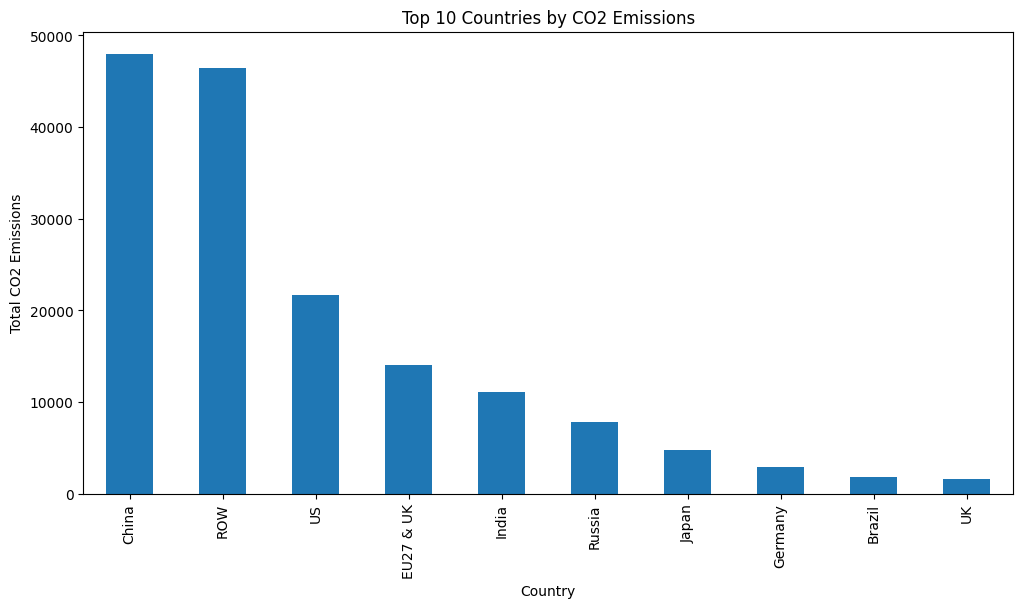

In [28]:
# sum of emissions by country plotting
country_emissions = data.groupby('country')['value'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
country_emissions.head(10).plot(kind='bar')
plt.title('Top 10 Countries by CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.show()

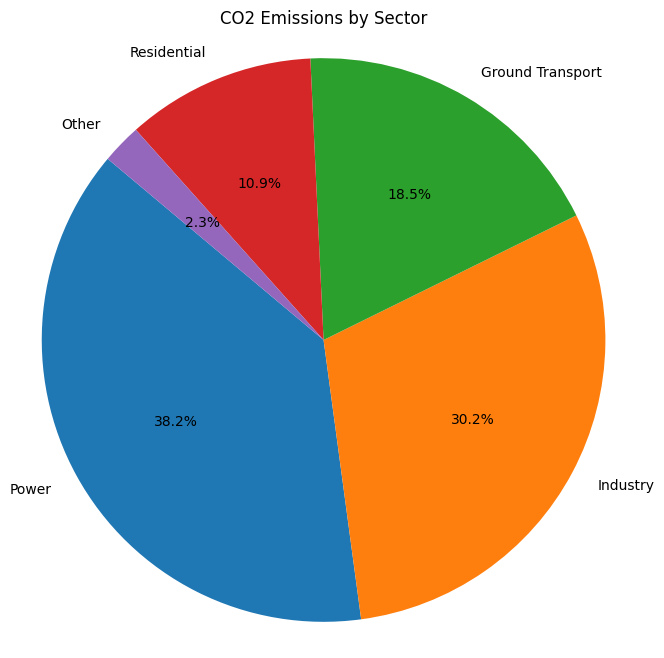

In [31]:
# sum of emissions by sector pie chart
sector_emissions = data.groupby('sector')['value'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(sector_emissions, labels=sector_emissions.index, autopct='%1.1f%%', startangle=140)
plt.title('CO2 Emissions by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()  

In [32]:
#Export cleaned data
data.to_csv('cleaned_CO2_Emissions.csv', index=False)